<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Yelp Ratings</h3> </center>
<center><h4>Megan Lau, Vanessa Lee, Rachel Li</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

We analyzed the data from the yelp restaurant dataset that represents the restaurants assets like parking, alcohol, location, and others to predict the yelp star rating. Yelp star ratings is a categorical target variable ratings into three buckets of poor 1-2.5 stars, fair 3-3.5 stars, and good 4-5 stars. In addition, we tested our hypotheses if parking or alcohol would change the yelp star. Our machine learning question was which of the 3 models ( KNeighbors, SVM, DecisionTree)  would best predict yelp star ratings. After training the dataset and selected features, we conducted the gridsearch to see how well the model fit with the prediction. We discovered that Decisions Tree was the best performance model. However, we do not recommend our model for predictions because teh accuracy and F1 score is below fifty percent.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement**
 
 
In our project, we chose to analyze the Yelp star ratings of restaurants in the US. Each restaurant has an average rating (from 1 to 5, including half stars) left by customers who either enjoyed the experience or not based on the amenities (features) that are provided by the restaurant. We want to analyze the characteristics and amenities that are common in highly-rated restaurants, compared to lower-rated restaurants. For example, restaurants may provide restaurant parking, accept credit cards, or are located near a college campus and are frequented by college students. Through this project, we will predict the Yelp rating of restaurants and determine the characteristics that are most important to customers when rating a restaurant. 
 
**Significance of the Problem**
 
Since our project aims to predict the Yelp star rating of restaurants, our findings can help restaurant owners understand what customers value most and how to improve their ratings of Yelp. By analyzing the restaurant service industry and qualities of highly-rated restaurants, as well as lower-rated restaurants,  we can also help business owners who are interested in expanding or opening a new restaurant determine what amenities to provide and what customers look for. Especially in recent times of economic turmoil, as restaurants are struggling to stay afloat, we hope our project can help restaurant owners improve their business and popularity, as well as their Yelp star ratings. 

**Research Questions**

Given the aforementioned problem and its importance, we set out to tackle the following questions:

*   The machine learning algorithm question is figuring out which of KNeighbors, SVM, Decision Tree using the target variable will be best to predict the yelp rating. 
*   Does serving alcohol impact rating? The context for the alcohol impact is the hypothesis that alcohol can attract customers to dine at a restaurant.
*   Does parking increase the rating of the restaurant? The context of the parking lot has different variations such as street parking, valet, garage, and more. 


**Hypotheses:**
    
   * **Hypothesis about machine learning algorithm:**
       * Null: KNeighbors, SVM, and Decision Tree algorithms do not differ significantly in performance and accuracy.
       * Alternative: KNeighbors, SVM, and Decision Tree algorithms differ significantly in performance and accuracy.
   * **Hypothesis about serving alcohol vs rating**:
       * Null: The star ratings of restaurants that serve alcohol and restaurants that don't serve alcohol are the same. 
       * Alternative: The star ratings of restaurants that serve alcohol and restaurants that don't serve alcohol are not the same. 
   * **Hypothesis about having restaurant parking vs rating**:
       * Null: The star ratings of restaurants that have available parking and restaurants that don't are the same.
       * Alternative: The star ratings of restaurants that have available parking and restaurants that don't are not the same.



<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Describe where you obtained your data
* Yelp: https://www.yelp.com/dataset
* Population: https://simplemaps.com/data/us-zips

Github Dataset Link: https://github.com/rli1215/Yelp-Rating-Prediction/blob/main/datasets/restaurant_dataset.csv

Describe the dataset:
- Yelp dataset for business contains 8 variables and 30,847 rows.
- US Zip Codes dataset contains 18 variables and 33,098 rows.

### 2.2 Variables

**Independent Variables (feature variables)**
- latitude
-	longitude
-	population	
- review_count	
- is_open	
- alcohol	
- parking	
- good_for_kids	
- reservations	
- delivery	
- takeout	
- accepts_credit_cards	

**Dependent Variables (target variable)**
* stars

**Rationale**

Our features are all the independent variables listed above. They are already binary, numerical data points, so we don't have to do any feature engineering with them. Our target variable is the Yelp Star review ratings, defined in the categories (1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5). This is also a categorical value, which is a target variable for a classification model.

**Predictive Model**

We are going to be predicting the yelp star ratings from the restaurant amenitie features and population feature. Given the dining amenities and available perks that a restaurant have, we will be predicting the outcome of yelp star reviews to find which machine learning algorithm and hypotheses are true. 

**A Supervised Learning Problem**

This is a supervised learning problem, sub-categorized to classification because the stars are in a limited range (e.g. 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5). We will be seeking to obtain a categorical output variable

**Machine Learning Algorithms to be Applied**

We will be using k-Nearest Neighbor, SVM, and Decision Tree algorithms. We chose these algorithms because we are analyzing the features and seeing if we can have a model that can predict the yelp star reviews as a classification problem.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling



#### Data Cleaning and Wrangling

In [ ]:
import pandas as pd

In [ ]:
import requests, zipfile, io

req = requests.get('https://github.com/rli1215/Yelp-Rating-Prediction/blob/main/datasets/yelp_business.zip') 
zip_file = zipfile.ZipFile(io.BytesIO(req.content))
zip_file.extractall()

In [ ]:
data = zip_file.read('yelp_academic_dataset_business.json')

In [ ]:
df_business = pd.read_json(data, lines=True)
df_business.head(10)

business_id                          name  \
0  f9NumwFMBDn751xgFiRbNA      The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q             Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                       Felinus   
3  6OAZjbxqM5ol29BuHsil3w          Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ       USE MY GUY SERVICES LLC   
5  cKyLV5oWZJ2NudWgqs8VZw   Oasis Auto Center - Gilbert   
6  oiAlXZPIFm2nBCt0DHLu_Q          Green World Cleaners   
7  ScYkbYNkDgCneBrD9vqhCQ  Junction Tire & Auto Service   
8  pQeaRpvuhoEqudo3uymHIQ           The Empanadas House   
9  EosRKXIGeSWFYWwpkbhNnA                Xtreme Couture   

                        address             city state postal_code   latitude  \
0               10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1     8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2         3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3                1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4            4827 E Downing Cir             Mesa    AZ       85205  33.428065   
5     1720 W Elliot Rd, Ste 105          Gilbert    AZ       85233  33.350399   
6  6870 S Rainbow Blvd, Ste 117        Las Vegas    NV       89118  36.063977   
7           6910 E Southern Ave             Mesa    AZ       85209  33.393885   
8                404 E Green St        Champaign    IL       61820  40.110446   
9  700 Kipling Avenue Etobicoke          Toronto    ON     M8Z 5G3  43.624539   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726648    4.5            26        1   
5 -111.827142    4.5            38        1   
6 -115.241463    3.5            81        1   
7 -111.682226    5.0            18        1   
8  -88.233073    4.5             5        1   
9  -79.529108    3.0            16        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                               None   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
5             {'BusinessAcceptsCreditCards': 'True'}   
6  {'BusinessParking': '{'garage': False, 'street...   
7  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
8  {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
9  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   
5  Auto Repair, Automotive, Oil Change Stations, ...   
6  Dry Cleaning & Laundry, Local Services, Laundr...   
7  Auto Repair, Oil Change Stations, Automotive, ...   
8  Ethnic Food, Food Trucks, Specialty Food, Impo...   
9  Martial Arts, Gyms, Fitness & Instruction, Act...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                               None  
2                                               None  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...  
5  {'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...  
6  {'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...  
7  {'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...  
8  {'Monday': '11:30-14:30', 'Tuesday': '11:30-14...  
9  {'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'...

In [ ]:
us_states = ['AL', 'AK', 'AS', 'AZ', 'AR', 
             'CA', 'CO', 'CT',
             'DE', 'DC', 
             'FL', 
             'GA', 'GU',
             'HI',
             'ID', 'IL', 'IN', 'IA',
             'KS', 'KY',
             'LA',
             'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
             'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 
             'MP',
             'OH', 'OK', 'OR',
             'PA', 'PR',
             'RI',
             'SC', 'SD',
             'TN', 'TX',
             'UT', 
             'VT', 'VI', 'VA', 
             'WA', 'WV', 'WI', 'WY']

In [ ]:
# drop unnecessary columns of this dataset

df_business = df_business.dropna()
df_business = df_business[df_business['categories'].str.contains('Restaurants')]
df_business = df_business[df_business['state'].isin(us_states)]
df_business = df_business.drop(columns=['name', 'address', 'city', 'hours', 'categories', 'state'])
df_business

business_id postal_code   latitude   longitude  stars  \
8       pQeaRpvuhoEqudo3uymHIQ       61820  40.110446  -88.233073    4.5   
33      vjTVxnsQEZ34XjYNS-XUpA       85032  33.602822 -111.983533    4.0   
41      98hyK2QEUeI8v2y0AghfZA       44114  41.512155  -81.663332    4.5   
42      fhNf_sg-XzZ3e7HEVGuOZg       89118  36.071196 -115.207463    3.0   
44      Ga2Bt7xfqoggTypWD5VpoQ       85282  33.393199 -111.976270    4.0   
...                        ...         ...        ...         ...    ...   
209376  cmsAFAymfVoBitSF8R6GKw       85295  33.304935 -111.788861    4.0   
209381  xVpE01l6ZXdEtVf5PkRpDg       53703  43.081022  -89.374006    4.0   
209383  BAVuLTDmpSzDCk37A5HjtQ       44070  41.416568  -81.921396    3.0   
209385  hskVqZCPqy-omm9CHi44xQ       28226  35.078538  -80.818358    2.0   
209390  SYa2j1boLF8DcGVOYfHPcA       85251  33.504062 -111.929431    3.5   

        review_count  is_open  \
8                  5        1   
33                10        1   
41                23        1   
42                10        0   
44                 9        0   
...              ...      ...   
209376           230        1   
209381            95        0   
209383            13        0   
209385            16        1   
209390            97        1   

                                               attributes  
8       {'RestaurantsAttire': 'u'casual'', 'Restaurant...  
33      {'GoodForKids': 'True', 'RestaurantsTakeOut': ...  
41      {'BusinessParking': 'None', 'Ambience': '{'tou...  
42      {'RestaurantsPriceRange2': '2', 'BusinessParki...  
44      {'Caters': 'False', 'RestaurantsGoodForGroups'...  
...                                                   ...  
209376  {'RestaurantsGoodForGroups': 'True', 'Ambience...  
209381  {'NoiseLevel': 'u'average'', 'BikeParking': 'T...  
209383  {'NoiseLevel': 'u'average'', 'BikeParking': 'F...  
209385  {'BusinessAcceptsCreditCards': 'True', 'Restau...  
209390  {'BusinessAcceptsCreditCards': 'True', 'Restau...  

[30847 rows x 8 columns]

In [ ]:
df_business.reset_index(drop=True, inplace=True)
df_business

business_id postal_code   latitude   longitude  stars  \
0      pQeaRpvuhoEqudo3uymHIQ       61820  40.110446  -88.233073    4.5   
1      vjTVxnsQEZ34XjYNS-XUpA       85032  33.602822 -111.983533    4.0   
2      98hyK2QEUeI8v2y0AghfZA       44114  41.512155  -81.663332    4.5   
3      fhNf_sg-XzZ3e7HEVGuOZg       89118  36.071196 -115.207463    3.0   
4      Ga2Bt7xfqoggTypWD5VpoQ       85282  33.393199 -111.976270    4.0   
...                       ...         ...        ...         ...    ...   
30842  cmsAFAymfVoBitSF8R6GKw       85295  33.304935 -111.788861    4.0   
30843  xVpE01l6ZXdEtVf5PkRpDg       53703  43.081022  -89.374006    4.0   
30844  BAVuLTDmpSzDCk37A5HjtQ       44070  41.416568  -81.921396    3.0   
30845  hskVqZCPqy-omm9CHi44xQ       28226  35.078538  -80.818358    2.0   
30846  SYa2j1boLF8DcGVOYfHPcA       85251  33.504062 -111.929431    3.5   

       review_count  is_open  \
0                 5        1   
1                10        1   
2                23        1   
3                10        0   
4                 9        0   
...             ...      ...   
30842           230        1   
30843            95        0   
30844            13        0   
30845            16        1   
30846            97        1   

                                              attributes  
0      {'RestaurantsAttire': 'u'casual'', 'Restaurant...  
1      {'GoodForKids': 'True', 'RestaurantsTakeOut': ...  
2      {'BusinessParking': 'None', 'Ambience': '{'tou...  
3      {'RestaurantsPriceRange2': '2', 'BusinessParki...  
4      {'Caters': 'False', 'RestaurantsGoodForGroups'...  
...                                                  ...  
30842  {'RestaurantsGoodForGroups': 'True', 'Ambience...  
30843  {'NoiseLevel': 'u'average'', 'BikeParking': 'T...  
30844  {'NoiseLevel': 'u'average'', 'BikeParking': 'F...  
30845  {'BusinessAcceptsCreditCards': 'True', 'Restau...  
30846  {'BusinessAcceptsCreditCards': 'True', 'Restau...  

[30847 rows x 8 columns]

In [ ]:
# check for all distinct attributes in attributes column

length = 0
loc = 0

for i in range(0, len(df_business)):
    if len(df_business['attributes'][i]) > length:
        length = len(df_business['attributes'][i])
        loc = i

df_business['attributes'][loc]

{'RestaurantsReservations': 'True',
 'BYOBCorkage': "'yes_free'",
 'RestaurantsDelivery': 'False',
 'RestaurantsTakeOut': 'True',
 'Corkage': 'False',
 'WiFi': "u'no'",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'RestaurantsAttire': "'casual'",
 'GoodForKids': 'True',
 'RestaurantsPriceRange2': '2',
 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}",
 'Caters': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'OutdoorSeating': 'False',
 'RestaurantsGoodForGroups': 'True',
 'NoiseLevel': "u'average'",
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'HasTV': 'True',
 'DietaryRestrictions': "{'dairy-free': True, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}",
 'B

In [ ]:
# select the attributes that appeared the most in the samples from above list

attributes = ['Alcohol',
              'BusinessParking',
              'GoodForKids',
              'OutdoorSeating',
              'RestaurantsAttire',
              'RestaurantsPriceRange2',
              'RestaurantsReservations',
              'RestaurantsDelivery',
              'RestaurantsTakeOut',
              'BusinessAcceptsCreditCards']

count = 0
for index in range(0,len(df_business)):
    
    attr = [index.split(':', 1)[0] for index in df_business['attributes'][index]]
    contain = [index for index in attr if index in attributes]
    
    if len(contain) == len(attributes):
            count += 1

print("Number of restaurants containing all attributes:", count)
print("Total Number of restaurants:", len(df_business))

Number of restaurants containing all attributes: 22267
Total Number of restaurants: 30847


In [ ]:
df_attributes = pd.DataFrame()

count = 0
for index in range(0, len(df_business)):
    
    attr = [index.split(':', 1)[0] for index in df_business['attributes'][index]]
    contain = [index for index in attr if index in attributes]
    
    if len(contain) == len(attributes):
            df_attributes = df_attributes.append(df_business.loc[index])

In [ ]:
df_attributes = df_attributes.reset_index(drop=True)
df_attributes

attributes  \
0      {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
1      {'GoodForKids': 'True', 'RestaurantsTakeOut': ...   
2      {'Caters': 'False', 'RestaurantsGoodForGroups'...   
3      {'RestaurantsDelivery': 'False', 'BusinessAcce...   
4      {'Alcohol': 'u'none'', 'GoodForKids': 'True', ...   
...                                                  ...   
22262  {'RestaurantsTakeOut': 'True', 'BusinessAccept...   
22263  {'RestaurantsGoodForGroups': 'True', 'Ambience...   
22264  {'NoiseLevel': 'u'average'', 'BikeParking': 'T...   
22265  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
22266  {'BusinessAcceptsCreditCards': 'True', 'Restau...   

                  business_id  is_open   latitude   longitude postal_code  \
0      pQeaRpvuhoEqudo3uymHIQ      1.0  40.110446  -88.233073       61820   
1      vjTVxnsQEZ34XjYNS-XUpA      1.0  33.602822 -111.983533       85032   
2      Ga2Bt7xfqoggTypWD5VpoQ      0.0  33.393199 -111.976270       85282   
3      tLpkSwdtqqoXwU0JAGnApw      1.0  41.434614  -81.527026       44128   
4      lK-wuiq8b1TuU7bfbQZgsg      1.0  41.489343  -81.711029       44113   
...                       ...      ...        ...         ...         ...   
22262  5VXlHFrYZZzj7zfZEsz5nQ      0.0  36.105289 -115.174037       89109   
22263  cmsAFAymfVoBitSF8R6GKw      1.0  33.304935 -111.788861       85295   
22264  xVpE01l6ZXdEtVf5PkRpDg      0.0  43.081022  -89.374006       53703   
22265  hskVqZCPqy-omm9CHi44xQ      1.0  35.078538  -80.818358       28226   
22266  SYa2j1boLF8DcGVOYfHPcA      1.0  33.504062 -111.929431       85251   

       review_count  stars  
0               5.0    4.5  
1              10.0    4.0  
2               9.0    4.0  
3               7.0    3.5  
4               4.0    3.0  
...             ...    ...  
22262         279.0    3.0  
22263         230.0    4.0  
22264          95.0    4.0  
22265          16.0    2.0  
22266          97.0    3.5  

[22267 rows x 8 columns]

In [ ]:
alcohol = []
parking = []
good_for_kids = []
outdoor_seating = []
casual_attire = []
price_range = []
reservations = []
delivery = []
takeout = []
accepts_credit_cards = []

In [ ]:
# manually feature engineer the attributes by assigning values of 0 and 1 when false and true, respectively

for attr in df_attributes['attributes']:
    for key, val in attr.items():
        # alcohol feature
        if key == 'Alcohol':
            if 'none' in val:
                alcohol.append(1)
            else:
                alcohol.append(0)
        # parking feature
        elif key == 'BusinessParking':
            if val == 'None':
                parking.append(0)
            else:
                parking_list = val[1:len(val) - 1].split(', ')
                
                contain = False
                for has_parking in parking_list:
                    contain = contain or ('True' in has_parking)

                if contain:
                    parking.append(1)
                else:
                    parking.append(0)
        # good_for_kids feature
        elif key == 'GoodForKids':
            if val == 'True':
                good_for_kids.append(1)
            else:
                good_for_kids.append(0)
        # outdoor_seating feature
        elif key == 'OutdoorSeating':
            if val == 'True':
                outdoor_seating.append(1)
            else:
                outdoor_seating.append(0)
        # casual_attire feature
        elif key == 'RestaurantsAttire':
            if 'casual' in val:
                casual_attire.append(1)
            else:
                casual_attire.append(0)
        # price_range feature
        elif key == 'RestaurantsPriceRange2':
            price_range.append(int(val))
        # reservations feature
        elif key == 'RestaurantsReservations':
            if val == 'True':
                reservations.append(1)
            else:
                reservations.append(0)
        # delivery feature
        elif key == 'RestaurantsDelivery':
            if val == 'True':
                delivery.append(1)
            else:
                delivery.append(0)
        # takeout feature
        elif key == 'RestaurantsTakeOut':
            if val == 'True':
                takeout.append(1)
            else:
                takeout.append(0)
        # accepts_credit_card feature
        elif key == 'BusinessAcceptsCreditCards':
            if val == 'True':
                accepts_credit_cards.append(1)
            else:
                accepts_credit_cards.append(0)
                
print(len(alcohol))
print(len(parking))
print(len(good_for_kids))
print(len(outdoor_seating))
print(len(casual_attire))
print(len(price_range))
print(len(reservations))
print(len(delivery))
print(len(takeout))
print(len(accepts_credit_cards))

22267
22267
22267
22267
22267
22267
22267
22267
22267
22267


In [ ]:
# only need postal code and population from US Zip Codes dataset

zip_codes_url = 'https://github.com/rli1215/Yelp-Rating-Prediction/blob/main/datasets/us_zip_codes.csv'
df_college = pd.read_csv(zip_codes_url)
df_college = df_college[df_college['state_id'].isin(us_states)]
df_college = df_college.drop(columns=['lat', 
                                        'lng', 
                                        'city', 
                                        'state_name', 
                                        'zcta', 
                                        'parent_zcta', 
                                        'density', 
                                        'county_fips',
                                        'county_fips_all',
                                        'county_name',
                                        'county_weights',
                                        'county_names_all',
                                        'imprecise',
                                        'military',
                                        'timezone',
                                        'state_id'])
df_college = df_college.rename(columns={'zip':'postal_code'})
df_college['postal_code'] = df_college['postal_code'].apply(str)
df_college.head(10)

postal_code  population
0         601       17242
1         602       38442
2         603       48814
3         606        6437
4         610       27073
5         612       60303
6         616       10765
7         617       23974
8         622        6578
9         623       42427

In [ ]:
# add the attributes to the Yelp dataset

df_attributes['alcohol'] = alcohol
df_attributes['parking'] = parking
df_attributes['good_for_kids'] = good_for_kids
df_attributes['outdoor_seating'] = outdoor_seating
df_attributes['casual_attire'] = casual_attire
df_attributes['price_range'] = price_range
df_attributes['reservations'] = reservations
df_attributes['delivery'] = delivery
df_attributes['takeout'] = takeout
df_attributes['accepts_credit_cards'] = accepts_credit_cards
df_attributes = df_attributes.drop(columns=['attributes'])
df_attributes

business_id  is_open   latitude   longitude postal_code  \
0      pQeaRpvuhoEqudo3uymHIQ      1.0  40.110446  -88.233073       61820   
1      vjTVxnsQEZ34XjYNS-XUpA      1.0  33.602822 -111.983533       85032   
2      Ga2Bt7xfqoggTypWD5VpoQ      0.0  33.393199 -111.976270       85282   
3      tLpkSwdtqqoXwU0JAGnApw      1.0  41.434614  -81.527026       44128   
4      lK-wuiq8b1TuU7bfbQZgsg      1.0  41.489343  -81.711029       44113   
...                       ...      ...        ...         ...         ...   
22262  5VXlHFrYZZzj7zfZEsz5nQ      0.0  36.105289 -115.174037       89109   
22263  cmsAFAymfVoBitSF8R6GKw      1.0  33.304935 -111.788861       85295   
22264  xVpE01l6ZXdEtVf5PkRpDg      0.0  43.081022  -89.374006       53703   
22265  hskVqZCPqy-omm9CHi44xQ      1.0  35.078538  -80.818358       28226   
22266  SYa2j1boLF8DcGVOYfHPcA      1.0  33.504062 -111.929431       85251   

       review_count  stars  alcohol  parking  good_for_kids  outdoor_seating  \
0               5.0    4.5        1        0              0                0   
1              10.0    4.0        1        1              1                0   
2               9.0    4.0        1        0              1                0   
3               7.0    3.5        1        1              1                0   
4               4.0    3.0        1        0              1                1   
...             ...    ...      ...      ...            ...              ...   
22262         279.0    3.0        0        0              1                0   
22263         230.0    4.0        0        0              1                0   
22264          95.0    4.0        0        1              0                1   
22265          16.0    2.0        1        1              1                0   
22266          97.0    3.5        1        1              1                1   

       casual_attire  price_range  reservations  delivery  takeout  \
0                  1            1             0         1        1   
1                  1            1             0         0        1   
2                  1            1             0         0        1   
3                  1            1             0         0        1   
4                  0            4             0         0        0   
...              ...          ...           ...       ...      ...   
22262              1            2             1         0        1   
22263              1            1             0         0        1   
22264              1            2             1         0        0   
22265              1            1             0         1        1   
22266              1            2             0         0        1   

       accepts_credit_cards  
0                         1  
1                         1  
2                         1  
3                         1  
4                         0  
...                     ...  
22262                     1  
22263                     1  
22264                     1  
22265                     1  
22266                     1  

[22267 rows x 17 columns]

In [ ]:
# merge Yelp and US Zip Codes datasets on postal code

df_final = pd.merge(df_attributes, df_college, on='postal_code')
df_final

business_id  is_open   latitude  longitude postal_code  \
0      pQeaRpvuhoEqudo3uymHIQ      1.0  40.110446 -88.233073       61820   
1      -LfTBo0oa_uD454ScEW2XA      0.0  40.118133 -88.242900       61820   
2      Z7r_FJXEyfyvVsyv2y7gFQ      1.0  40.099648 -88.244768       61820   
3      VHsNB3pdGVcRgs6C3jt6Zg      0.0  40.119039 -88.243882       61820   
4      ZMcbVIEXsLO7j1Q1GXKPSw      1.0  40.111212 -88.229079       61820   
...                       ...      ...        ...        ...         ...   
22117  567fXsTtYU584RytYQNpDQ      1.0  41.152777 -81.506124       44301   
22118  CSKLjqgN3ZsrihIvPsz5cA      1.0  41.313519 -81.981972       44028   
22119  v14P9-vB1yjxFfFEYEWudw      1.0  43.073159 -89.385926       53702   
22120  CRxcrkRBrqE07iHvObGSag      0.0  35.535286 -80.799516       28115   
22121  dqzdumTXqMvoB7SVXos-Qg      0.0  41.490803 -81.672676       44101   

       review_count  stars  alcohol  parking  good_for_kids  outdoor_seating  \
0               5.0    4.5        1        0              0                0   
1              47.0    3.0        1        1              1                0   
2              60.0    4.0        1        1              1                0   
3             130.0    3.5        0        1              0                1   
4              60.0    4.0        1        1              1                0   
...             ...    ...      ...      ...            ...              ...   
22117          14.0    3.0        1        0              0                0   
22118          32.0    3.5        0        0              1                1   
22119         174.0    4.0        0        1              1                1   
22120          18.0    2.0        1        0              1                0   
22121          19.0    3.5        1        1              1                0   

       casual_attire  price_range  reservations  delivery  takeout  \
0                  1            1             0         1        1   
1                  1            1             0         1        1   
2                  1            1             0         1        1   
3                  1            2             1         0        1   
4                  1            1             0         0        1   
...              ...          ...           ...       ...      ...   
22117              1            2             0         1        1   
22118              1            2             1         0        1   
22119              1            2             0         1        1   
22120              1            1             0         1        1   
22121              1            2             0         0        1   

       accepts_credit_cards  population  
0                         1       38156  
1                         1       38156  
2                         1       38156  
3                         1       38156  
4                         1       38156  
...                     ...         ...  
22117                     1       15060  
22118                     1        9000  
22119                     1         147  
22120                     1       37023  
22121                     1         610  

[22122 rows x 18 columns]

In [ ]:
columns = ['latitude', 
           'longitude', 
           'population', 
           'review_count', 
           'is_open', 
           'alcohol', 
           'parking', 
           'good_for_kids', 
           'outdoor_seating', 
           'casual_attire', 
           'price_range', 
           'reservations', 
           'delivery', 
           'takeout', 
           'accepts_credit_cards',
           'stars']
df_final = df_final.drop(columns=['business_id', 'postal_code'])
df_final = df_final[columns]
df_final

latitude  longitude  population  review_count  is_open  alcohol  \
0      40.110446 -88.233073       38156           5.0      1.0        1   
1      40.118133 -88.242900       38156          47.0      0.0        1   
2      40.099648 -88.244768       38156          60.0      1.0        1   
3      40.119039 -88.243882       38156         130.0      0.0        0   
4      40.111212 -88.229079       38156          60.0      1.0        1   
...          ...        ...         ...           ...      ...      ...   
22117  41.152777 -81.506124       15060          14.0      1.0        1   
22118  41.313519 -81.981972        9000          32.0      1.0        0   
22119  43.073159 -89.385926         147         174.0      1.0        0   
22120  35.535286 -80.799516       37023          18.0      0.0        1   
22121  41.490803 -81.672676         610          19.0      0.0        1   

       parking  good_for_kids  outdoor_seating  casual_attire  price_range  \
0            0              0                0              1            1   
1            1              1                0              1            1   
2            1              1                0              1            1   
3            1              0                1              1            2   
4            1              1                0              1            1   
...        ...            ...              ...            ...          ...   
22117        0              0                0              1            2   
22118        0              1                1              1            2   
22119        1              1                1              1            2   
22120        0              1                0              1            1   
22121        1              1                0              1            2   

       reservations  delivery  takeout  accepts_credit_cards  stars  
0                 0         1        1                     1    4.5  
1                 0         1        1                     1    3.0  
2                 0         1        1                     1    4.0  
3                 1         0        1                     1    3.5  
4                 0         0        1                     1    4.0  
...             ...       ...      ...                   ...    ...  
22117             0         1        1                     1    3.0  
22118             1         0        1                     1    3.5  
22119             0         1        1                     1    4.0  
22120             0         1        1                     1    2.0  
22121             0         0        1                     1    3.5  

[22122 rows x 16 columns]

In [ ]:
df_final.to_csv('restaurant_dataset.csv')

In [ ]:
import pandas as pd
restaurant_dataset_url = 'https://github.com/rli1215/Yelp-Rating-Prediction/blob/main/datasets/restaurant_dataset.csv'
restaurant_df = pd.read_csv(restaurant_dataset_url)

In [ ]:
restaurant_df = restaurant_df.drop(columns=['Unnamed: 0'])
restaurant_df['stars'] = restaurant_df['stars'].astype('category')
restaurant_df

latitude  longitude  population  review_count  is_open  alcohol  \
0      40.110446 -88.233073       38156           5.0      1.0        1   
1      40.118133 -88.242900       38156          47.0      0.0        1   
2      40.099648 -88.244768       38156          60.0      1.0        1   
3      40.119039 -88.243882       38156         130.0      0.0        0   
4      40.111212 -88.229079       38156          60.0      1.0        1   
...          ...        ...         ...           ...      ...      ...   
22760  41.152777 -81.506124       15060          14.0      1.0        1   
22761  41.313519 -81.981972        9000          32.0      1.0        0   
22762  43.073159 -89.385926         147         174.0      1.0        0   
22763  35.535286 -80.799516       37023          18.0      0.0        1   
22764  41.490803 -81.672676         610          19.0      0.0        1   

       parking  good_for_kids  reservations  delivery  takeout  \
0            0              0             0         1        1   
1            1              1             0         1        1   
2            1              1             0         1        1   
3            1              0             1         0        1   
4            1              1             0         0        1   
...        ...            ...           ...       ...      ...   
22760        0              0             0         1        1   
22761        0              1             1         0        1   
22762        1              1             0         1        1   
22763        0              1             0         1        1   
22764        1              1             0         0        1   

       accepts_credit_cards stars  
0                         1   4.5  
1                         1   3.0  
2                         1   4.0  
3                         1   3.5  
4                         1   4.0  
...                     ...   ...  
22760                     1   3.0  
22761                     1   3.5  
22762                     1   4.0  
22763                     1   2.0  
22764                     1   3.5  

[22765 rows x 13 columns]

In [ ]:
def features_and_target(df):
    features = df.iloc[:,0:12]
    target = df['stars']
    return features, target

In [ ]:
features, target = features_and_target(restaurant_df)

In [ ]:
features

latitude  longitude  population  review_count  is_open  alcohol  \
0      40.110446 -88.233073       38156           5.0      1.0        1   
1      40.118133 -88.242900       38156          47.0      0.0        1   
2      40.099648 -88.244768       38156          60.0      1.0        1   
3      40.119039 -88.243882       38156         130.0      0.0        0   
4      40.111212 -88.229079       38156          60.0      1.0        1   
...          ...        ...         ...           ...      ...      ...   
22760  41.152777 -81.506124       15060          14.0      1.0        1   
22761  41.313519 -81.981972        9000          32.0      1.0        0   
22762  43.073159 -89.385926         147         174.0      1.0        0   
22763  35.535286 -80.799516       37023          18.0      0.0        1   
22764  41.490803 -81.672676         610          19.0      0.0        1   

       parking  good_for_kids  reservations  delivery  takeout  \
0            0              0             0         1        1   
1            1              1             0         1        1   
2            1              1             0         1        1   
3            1              0             1         0        1   
4            1              1             0         0        1   
...        ...            ...           ...       ...      ...   
22760        0              0             0         1        1   
22761        0              1             1         0        1   
22762        1              1             0         1        1   
22763        0              1             0         1        1   
22764        1              1             0         0        1   

       accepts_credit_cards  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
22760                     1  
22761                     1  
22762                     1  
22763                     1  
22764                     1  

[22765 rows x 12 columns]

In [ ]:
target.value_counts()

4.0    6337
3.5    5752
3.0    3800
4.5    2953
2.5    2078
2.0    1138
1.5     408
5.0     254
1.0      45
Name: stars, dtype: int64

In [ ]:
def classify_stars(rating):
    if rating <= 5.0 and rating >= 4.0:
        return 'good'
    elif rating == 3.5:
        return 'fair'
    else:
        return'poor'

In [ ]:
# classify star ratings into four categories: good, fair, and poor
target = restaurant_df['stars'].apply(classify_stars)

#### Preprocess Variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [ ]:
def preprocess_variables(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    
    scaled_features = scaler.transform(X) 
    
    return scaled_features

In [ ]:
# preprocess features to scale data using MinMaxScaler
scaled_features = preprocess_variables(features)

In [ ]:
def split_train_test(X, y):
    return train_test_split(X, y, random_state=3000, stratify=y)

In [ ]:
# split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = split_train_test(scaled_features, target)

In [ ]:
# ratios of target variables in each category

y_train.value_counts() / y_train.shape[0]

good    0.419258
poor    0.328062
fair    0.252680
Name: stars, dtype: float64

#### Feature Extraction

In [ ]:
import itertools  

def RFE_feature_selection(X_train_param, X_test_param):
    select = RFE(DecisionTreeClassifier(random_state=3000), n_features_to_select=5)
    select.fit(X_train_param, y_train)
    X_train_selected = select.transform(X_train_param)
    X_test_selected = select.transform(X_test_param)
    selected_features = (features.columns, select.get_support())
    
    print('Selected features after RFE:')
    for col, flag in itertools.zip_longest(*selected_features):
        if flag:
            print('\t' + col)
    
    return X_train_selected, X_test_selected

In [ ]:
# select important features from scaled X sets
X_train_selected, X_test_selected = RFE_feature_selection(X_train_scaled, X_test_scaled)

Selected features after RFE:
	latitude
	longitude
	population
	review_count
	delivery


### 3.2. Data Exploration


#### Population vs. Star Rating Map

In [ ]:
restaurant_df_with_state = pd.read_csv('https://github.com/rli1215/Yelp-Rating-Prediction/blob/main/datasets/restaurant_dataset_with_state.csv')
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = restaurant_df_with_state['longitude'],
        lat = restaurant_df_with_state['latitude'],
        text = 'State: ' + restaurant_df_with_state['state'] 
                + '\tPopulation: ' + restaurant_df_with_state['population'].astype(str),
        mode = 'markers',
        marker = dict(
            size = restaurant_df_with_state['population'] / 1000,
            line = dict(width=1, color='rgba(102, 102, 102)'),
            sizemode='area',
            cmin = 1,
            color = restaurant_df_with_state['stars'],
            cmax = 5,
            colorbar_title="Star Rating")))

fig.update_layout(title='Star Ratings vs. Populations by Zip Code', geo_scope='usa')
fig.show()

![](https://github.com/vlee818/restaurant-dataset/blob/master/map_visualization.png?raw=true)

The map shows the location so yelp restaurants in the States by zip code with the population of the location. The color legend shows the yelp star rating per restaurant. We can see that locations that are highly dense like Virginia with 30,000 have more yellow tones versus a lower population like the midwest with the purple.


#### Review Count vs. Star Rating Scatterplot


In [ ]:
restaurant_df_vis = pd.read_csv(restaurant_dataset_url)
restaurant_df_vis = restaurant_df_vis.drop(columns=['Unnamed: 0'])

In [ ]:
import plotly.express as px

group_by_stars = restaurant_df_vis.groupby("stars").median()
fig = px.scatter(group_by_stars, x = 'review_count', y = group_by_stars.index, range_y = [0,6], title = "Star Rating vs Median Review Count", trendline="ols")
fig.update_xaxes(title_text = "review count median")
fig.update_yaxes(title_text = "star rating")
fig.show()

![](https://github.com/vlee818/restaurant-dataset/blob/master/scatterplot_visualization.png?raw=true)

There is a correlation between review counts and star rating.Besides the 5 star rating, star ratings from 1 to 4.5 and the median review count have a positive correlation. The regression line is upwards sloping. This shows that restaurants with more reviews tend to have higher star ratings.
It also makes sense that 5 star ratings have less review counts, since it is less likely for a restaurant with many customer ratings and reviews to have a perfect average star rating. A five star rating may be more common in recently opened restaurants with less reviews and ratings, which explains the low median review count for 5 star ratings.

### Heatmap Visualization


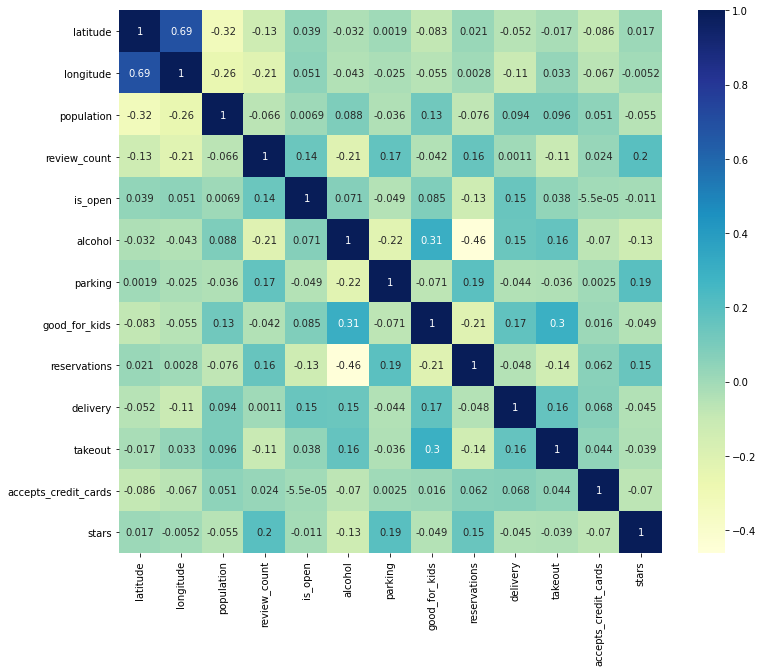

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# heatmap showing correlations between all variables
plt.figure(figsize=(13, 13))
sns.heatmap(restaurant_df_vis.corr(), cmap='YlGnBu', square=True, annot=True)
plt.subplots_adjust(bottom=0.3)
plt.show()

![](https://github.com/vlee818/restaurant-dataset/blob/master/heatmap_visualization.png?raw=true)

Mapped each feature in a matrix with other features in a heatmap to know the strength of the relationship. A heat map is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity. The dark blue signifies a low relationship and the yellow color signifies a strong relationship. A negative number means there is no relation.

### 3.3. Model Construction


In [ ]:
# Mann-Whitney U test
from scipy import stats
from scipy.stats import mannwhitneyu
import plotly.express as plt

#### Hypothesis: Parking 

In [ ]:
data = pd.read_csv(restaurant_dataset_url)
data = data.drop(columns='Unnamed: 0')
descr = data[['parking', 'stars']].copy()

descriptives = descr.groupby('parking').agg(['count', 'mean', 'std', 'sem'])["stars"]
descriptives

count      mean       std       sem
parking                                     
0         5179  3.227940  0.871546  0.012111
1        17586  3.573809  0.682791  0.005149

In [ ]:
graph = plt.bar(descriptives, x = descriptives.index, y = "mean", error_x = "sem", error_y = "sem", range_y = [0,5], 
                template='seaborn', width=500, title = "Mean Star Rating vs Parking attribute")
graph.update_xaxes(title_text = "Parking")
graph.update_yaxes(title_text = "Star Rating")
graph.show()

![](https://github.com/vlee818/restaurant-dataset/blob/master/parking_histogram.png?raw=true)

In [ ]:
yes_parking = descr[descr["parking"] == 1]["stars"]
no_parking = descr[descr["parking"] == 0]["stars"]

In [ ]:
stats.ttest_ind(no_parking, yes_parking)

Ttest_indResult(statistic=-29.967063413752356, pvalue=1.5061571476080812e-193)

In [ ]:
stats.levene(no_parking, yes_parking)

LeveneResult(statistic=708.3158130582513, pvalue=1.0436651294431931e-153)

In [ ]:
stats.shapiro(data["stars"])

ShapiroResult(statistic=0.9332330226898193, pvalue=0.0)

In [ ]:
# compare samples
result = stats.mannwhitneyu(no_parking, yes_parking)
tstatistic = result[0]
pvalue = result[1]
df_parking = len(no_parking) + len(yes_parking) - 2

def report_independent_t(t, p, df):
    print("t(%d)=%0.2f, p=%0.3f" %(df,t,p))
    
report_independent_t(tstatistic, pvalue, df_parking)

t(22763)=35004706.00, p=0.000


#### Hypothesis: Alcohol

In [ ]:
alcohol_df = data[["alcohol","stars"]]
descriptives = alcohol_df.groupby("alcohol").agg(["count", "mean", "std", "sem"])["stars"]
descriptives

count      mean       std       sem
alcohol                                     
0        11831  3.588496  0.596506  0.005484
1        10934  3.394092  0.865292  0.008275

In [ ]:
graph = plt.bar(descriptives, x = descriptives.index, y = "mean", error_x = "sem", error_y = "sem", range_y = [0,5], 
                template='seaborn', width=500, title = "Mean star rating vs Alcohol attribute")
graph.update_xaxes(title_text = "Alcohol")
graph.update_yaxes(title_text = "star rating")
graph.show()

![](https://github.com/vlee818/restaurant-dataset/blob/master/alcohol_visualization.png?raw=true)

In [ ]:
no_alcohol = alcohol_df[alcohol_df["alcohol"] == 0]["stars"]
alcohol = alcohol_df[alcohol_df["alcohol"] == 1]["stars"]

In [ ]:
stats.ttest_ind(no_alcohol, alcohol)

Ttest_indResult(statistic=19.85915109710859, pvalue=5.014544758771104e-87)

In [ ]:
stats.levene(no_alcohol, alcohol)

LeveneResult(statistic=1492.7278331007549, pvalue=2.35452665e-316)

In [ ]:
stats.shapiro(data["stars"])

ShapiroResult(statistic=0.9332330226898193, pvalue=0.0)

In [ ]:
result = stats.mannwhitneyu(no_alcohol, alcohol)
tstatistic = result[0]
pvalue = result[1]
df_alcohol = len(no_alcohol) + len(alcohol) - 2

In [ ]:
def report_independent_t(t, p, df):
    print("t(%d)=%0.2f, p=%0.3f" %(df,t,p))
    
report_independent_t(tstatistic, pvalue, df_alcohol)

t(22763)=58192000.50, p=0.000


#### Machine Learning

In [ ]:
estimators = {'k-Nearest_Neighbor': KNeighborsClassifier(), 
              'Support_Vector_Machine': LinearSVC(max_iter=1000000), 
              'Decision_Tree': DecisionTreeClassifier()}

Please refer to [F1 and Accuracy Scores for Scaled Features](https://colab.research.google.com/drive/1Yz__MVCAyGyt-IVwVGKmuoMloQhOvdHn?authuser=1#scrollTo=LqKfs1JY_z3p&line=1&uniqifier=1) and [F1 and Accuracy Scores for Selected Features](https://colab.research.google.com/drive/1Yz__MVCAyGyt-IVwVGKmuoMloQhOvdHn?authuser=1#scrollTo=r56FrU1VqCG4&line=1&uniqifier=1) for model construction and training.

### 3.4. Model Evaluation


#### F1 and Accuracy Scores for Scaled Features

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train_scaled, y=y_train)
    train_pred = model.predict(X_train_scaled)
    train_f1 = f1_score(y_train, train_pred, average = "weighted")
    train_accuracy = model.score(X_train_scaled, y_train)
    
    test_pred = model.predict(X_test_scaled)
    test_f1 = f1_score(y_test, test_pred, average = "weighted")
    test_accuracy = model.score(X_test_scaled, y_test)
    
    print(estimator_name + ": \n\tF1 score on scaled training"+ f' set: {train_f1:.4}'+ "\n\t"
             + "Accuracy on scaled training" + f' set: {train_accuracy:.2%}')
    print("\t" + "F1 score on scaled testing" + f' set: {test_f1:.4}'+ "\n\t"
             + "Accuracy on scaled testing" + f' set: {test_accuracy:.2%}' + "\n")

k-Nearest_Neighbor: 
	F1 score on scaled training set: 0.6313
	Accuracy on scaled training set: 63.08%
	F1 score on scaled testing set: 0.465
	Accuracy on scaled testing set: 46.38%

Support_Vector_Machine: 
	F1 score on scaled training set: 0.4219
	Accuracy on scaled training set: 47.62%
	F1 score on scaled testing set: 0.4233
	Accuracy on scaled testing set: 47.89%

Decision_Tree: 
	F1 score on scaled training set: 1.0
	Accuracy on scaled training set: 100.00%
	F1 score on scaled testing set: 0.4378
	Accuracy on scaled testing set: 43.69%



#### F1 and Accuracy Scores for Selected Features

In [ ]:
for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train_selected, y=y_train)
    train_pred = model.predict(X_train_selected)
    train_f1 = f1_score(y_train, train_pred, average = "weighted")
    train_accuracy = model.score(X_train_selected, y_train)
    
    test_pred = model.predict(X_test_selected)
    test_f1 = f1_score(y_test, test_pred, average = "weighted")
    test_accuracy = model.score(X_test_selected, y_test)
    
    print(estimator_name + ": \n\tF1 score on selected training"+ f' set: {train_f1:.4}'+ "\n\t"
             + "Accuracy score on selected training" + f' set: {train_accuracy:.2%}')
    print("\t" + "F1 score on selected testing" + f' set: {test_f1:.4}'+ "\n\t"
             + "Accuracy score on selected testing" + f' set: {test_accuracy:.2%}' + "\n")

k-Nearest_Neighbor: 
	F1 score on selected training set: 0.6291
	Accuracy score on selected training set: 62.88%
	F1 score on selected testing set: 0.4443
	Accuracy score on selected testing set: 44.38%

Support_Vector_Machine: 
	F1 score on selected training set: 0.4088
	Accuracy score on selected training set: 48.44%
	F1 score on selected testing set: 0.4126
	Accuracy score on selected testing set: 48.91%

Decision_Tree: 
	F1 score on selected training set: 1.0
	Accuracy score on selected training set: 100.00%
	F1 score on selected testing set: 0.4197
	Accuracy score on selected testing set: 41.83%



Accuracy is the sum of correct predictions over the total number of predictions. However, evaluating the model performance just on accuracy is not enough. We also found the F1 score, which is the combination of the recall and precision. Accuracy is used when the True Positives and True negatives are more important, while F1-score is used when the False Negatives and False Positives are crucial. Thus, we used both accuracy and f1-score to evaluate performance.  
We compared KNeighbors, SVM, and Decision Tree algorithms. We found that the algorithms performed better overall with the scaled features set, instead of the selected features set. The results of the performance on the scaled features set are below. For the training set, KNeighbors algorithm had higher accuracy and F1 score than for the testing set. The model seems to be quite overfitted, since the performance on the training set is much higher than the testing set.
For the training set, the SVM algorithm had an accuracy of 47.62% and F1 score of 0.4219. For the testing set, the SVM algorithm had an accuracy of 47.89% and F1 score of 0.4233. This seems relatively similar, so no overfitting or underfitting is observed. For the training set, the Decision Tree algorithm had an accuracy of 100.00% and F1 score of 0.100. For the testing set, the Decision Tree algorithm had an accuracy of 42.53% and F1 score of 0.4358. Although the performance on the training set was very high, there is much overfitting because the performance was much lower on the testing set.

#### Hypothesis and Machine Learning Evaluation

**Hypothesis: Parking vs Star Rating**

**Null Hypothesis**: The star ratings of restaurants that have available 

parking and restaurants that don't are the same.

**Alternative Hypothesis**: The star ratings of restaurants that have available parking and restaurants that don't are not the same.

**Test and Purpose**: For an independent-samples t test, assumptions of normality, as assessed by Shapiro-Wilk's test and homogeneity (equality) of variances, as assessed by Levene's test were not met (p < .05). A non-parametric test is used instead. The Mann-Whitney U Test was conducted to compare the star ratings of restaurants that has parking and no parking.

**Actual Results**: Results showed a statistically significant difference between the conditions, t(22120) = 32179606.00, p < .001. An examination of the average star rating in each condition revealed that the restaurants that do have parkin have greater average star rating (	n = 17206, M = 3.568290, SE = 0.005168) compared to restaurants that don't have parking (n = 4916, M = 3.215114, SE =	0.012317).

**Meaning**: Since p < 0.05, we reject the null hypothesis. These results indicate that restaurants that do have parking have a relationship with yelp star ratings.

---

**Hypothesis about serving alcohol vs rating:**

**Null Hypothesis**: The star ratings of restaurants that serve alcohol and restaurants that don't serve alcohol are the same.

**Alternative Hypothesis**: The star ratings of restaurants that serve alcohol and restaurants that don't serve alcohol are not the same.

**Test and Purpose**: For an independent-samples t test, assumptions of normality, as assessed by Shapiro-Wilk's test and homogeneity (equality) of variances, as assessed by Levene's test were not met (p < .05). A non-parametric test is used instead. The Mann-Whitney U Test was conducted to compare the star ratings of restaurants that don't sell alcohol and restaurants that sell alcohol.

**Actual Results**: Results showed a statistically significant difference between restaurants that serve alcohol and restaurants that don't, t(22120) = 54738842.00, p < .001. An examination of the correlation between stars and the alcohol feature variable shows that there is a relationship, but it is a very weak one (r = -0.13 from heat map visualization). The average star rating in each condition revealed that the restaurants that don't sell alcohol have greater average star rating (n = 11565, M = 3.583441, SE = 0.005508) compared to restaurants that provide alcohol (n = 10557, M = 3.387231, SE = 0.008355). However, because the correlation pretty weak, we conclude that restaurants that serve alcohol and restaurants that don't serve alcohol have a statistically significant difference in terms of star rating, but more data is needed to conclude which condition has greater star ratings.

**Meaning**: These results indicate that restaurants that don't sell alcohol and restaurants that do differ in star ratings on Yelp. Providing alcohol is significant in determining star ratings.

---

**Machine Learning: Can we predict the yelp star rating?**

Hypothesis about machine learning algorithm:

**Null Hypothesis**: KNeighbors, SVM, and Decision Tree algorithms do not differ significantly in performance and accuracy.

**Alternative Hypothesis**: KNeighbors, SVM, and Decision Tree algorithms differ significantly in performance and accuracy.

**Interpretation**: Before hyperparameter tuning, we cannot conclude which ML algorithm performed the best due to overfitting for Decision Tree and KNeighbors, thus, failing to reject or not reject the null hypothesis. However, F1 and accuracy scores were compared between scaled data and selected data (based on the scaled data). There are slightly higher F1 and accuracy scores for scaled data than selected data, but we cannot conclude that scaled data leads to better performance of ML algorithms than selected data.


### 3.5. Model Optimization

In [ ]:
param_grid = {'k-Nearest_Neighbor': {'n_neighbors': [10, 15, 20], 'metric': ['euclidean', 'manhattan']},
              'Support_Vector_Machine': {'penalty': ['l1', 'l2'], 'loss': ['hinge','squared-hinge']},
              'Decision_Tree': {'max_depth': [1, 5, 10], 'min_samples_split': [150, 1000, 1500]}}

In [ ]:
def grid_search(X_train_param, X_test_param):
    for param, estimator in itertools.zip_longest(param_grid.items(), estimators.items()):
        grid_search = GridSearchCV(estimator[1], param[1], cv=5)
        grid_search.fit(X=X_train_param, y=y_train)

        print(estimator[0] + ":")
        print("\tBest parameters: ", grid_search.best_params_)
        print('\tCross validation score with best parameters: ', grid_search.best_score_)
        print('')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print('Grid Search Approach with All Features:')
print('_______________________________________\n')
grid_search(X_train_scaled, X_test_scaled)
print('Grid Search Approach with Only Selected Features:')
print('_________________________________________________\n')
grid_search(X_train_selected, X_test_selected)

Grid Search Approach with All Features:
_______________________________________

k-Nearest_Neighbor:
	Best parameters:  {'metric': 'euclidean', 'n_neighbors': 20}
	Cross validation score with best parameters:  0.484742079165884

Support_Vector_Machine:
	Best parameters:  {'loss': 'hinge', 'penalty': 'l2'}
	Cross validation score with best parameters:  0.47132899498319303

Decision_Tree:
	Best parameters:  {'max_depth': 10, 'min_samples_split': 1000}
	Cross validation score with best parameters:  0.5121538647597825

Grid Search Approach with Only Selected Features:
_________________________________________________

k-Nearest_Neighbor:
	Best parameters:  {'metric': 'euclidean', 'n_neighbors': 20}
	Cross validation score with best parameters:  0.46617412926362123

Support_Vector_Machine:
	Best parameters:  {'loss': 'hinge', 'penalty': 'l2'}
	Cross validation score with best parameters:  0.4729111633176971

Decision_Tree:
	Best parameters:  {'max_depth': 5, 'min_samples_split': 1000}
	Cros

We tuned our models using GridSearch to prevent overfitting. Before there were huge discrepancies between the performance of our models on the training and testing set, especially for k-Nearest Neighbor and Decision Tree. After tuning, the models should not be overfitting as much.

### 3.6. Model Testing

In [ ]:
# test tuned algorithm with testing set

tuned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=150).fit(X=X_train_scaled, y=y_train)
pred = tuned_model.predict(X_test_scaled)
f1 = f1_score(y_test, pred, average = "weighted")
accuracy = tuned_model.score(X_test_scaled, y_test)

print('Decision_Tree (with tuned max_depth=5 and min_samples_split=150):')
print("\t" + "F1 score on scaled testing" + f' set: {f1:.2%}'+ "\n\t"
          + "Accuracy on scaled testing" + f' set: {accuracy:.2%}' + "\n")

Decision_Tree (with tuned max_depth=5 and min_samples_split=150):
	F1 score on scaled testing set: 43.84%
	Accuracy on scaled testing set: 49.68%



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION


**Interpret Results**

In the beginning we cannot define which one is the best since there were no high F1 and accuracy scores, yet they had big discrepancies. We hyperaparter tune, and discovered the cross validation score repsetntas the mean accuracy for the modeling was highest for Decision Tree Classifier. After hyperarapmter tuning, the Decision tree revealed the best performance due to it’s high cross validation as it’s parameter ({'max_depth': 10, 'min_samples_split': 1000}). For the predicted model there is no perfect model, the scores are not high. After tuning the f1 score and accuracy is still below 50%. 
After using GridSearch to hyperparameter tune the models, we found that the algorithms performed better overall on the scaled features dataset as opposed to the selected features dataset. With the scaled features dataset, the cross validation score with the best parameters (euclidean metric, 20 n-neighbors) for K-Nearest Neighbor is 0.4847. The cross validation score with the best parameters (hinge loss, 12 penalty) for SVM is 0.4731. The cross validation score with the best parameters (10 max depth, 1000 min samples split) for Decision tree is 0.5122. 
Since the Decision Tree algorithm performed the best in terms of the cross validation score (mean accuracy from cross validation), we used the Decision Tree algorithm to predict with our testing set. 

Based on our findings, we conclude that we can’t use the features in our dataset to predict our target variable, the star rating. The best performance, even after hyperparameter tuning our models, is with our Decision Tree, with F1 score of 0.4384 and accuracy of 49.68%. Since our performance is not very high, we don’t believe we can use our features to predict our outcome variable very well. Also, after examining our heatmap visualization that showed the correlation between our feature variables and our target variable, most of the features had a low correlation (r is less than 0.1). 

**Hypothesis Interpretation**

For the first hypothesis question analyzing the parking vs star rating. There is a significant difference in our data. We conducted the Mann Whitney U test on the features parking and stars and received  t(22120) = 32179606.00, p < .001. We reject the null hypothesis that there is no difference, and accept that there is a difference between parking and yelp star reviews. The parking have greater average star rating ( n = 17206, M = 3.568290, SE = 0.005168) compared to restaurants that don't have parking (n = 4916, M = 3.215114, SE = 0.012317).This aligns with the heatmap findings that there is a correlations of 0.19. 

For the second hypothesis question analyzing alcohol vs star rating, results showed a statistically significant difference between restaurants that serve alcohol and restaurants that don't, t(22120) = 54738842.00, p < .001. An examination of the correlation between stars and the alcohol feature variable shows that there is a relationship, but it is a very weak one (r = -0.13 from heat map visualization). The average star rating in each condition revealed that the restaurants that don't sell alcohol have greater average star rating (n = 11565, M = 3.583441, SE = 0.005508) compared to restaurants that provide alcohol (n = 10557, M = 3.387231, SE = 0.008355). However, because the correlation is pretty weak, we conclude that restaurants that serve alcohol and restaurants that don't serve alcohol have a statistically significant difference in terms of star rating, but more data is needed to conclude which condition has greater star ratings.


**Conclusion/ Future Work**

Overall, the performance of our algorithms was not super high (< 50% accuracy). In the future, to improve the performance, we would find more features that are significant in determining a restaurant’s Yelp star rating. We noticed that most of our features had a low correlation with a star rating, which may have decreased the performance of our algorithms. For example, we could have a population of nearby colleges as a feature, since college students may tend to give higher ratings. Finding other datasets to join with out yelp data to see if other features not covered in what Yelp gives us. Our dataset may also not have been large enough to truly reveal which features are significant in predicting star rating. In the future, we would use more data to produce a more accurate analysis of the features that significantly affect star ratings of restaurants.


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS


Section 1
Rachel wrote the paragraphs. We discussed the algorithms, potential hypothesis and machine learning questions together. Through the FLA and memoirs submitted earlier, we collected the memos together to 
Section 2
The data was gathered through yelp and online searches. Megan wrote the section. It was discussed as a team. Vanessa cleaned the data, cleaned, scaled, and preprocessed it.
Section 3
Rachel worked on the alcohol hypothesis, Megan worked on the parking hypothesis, Vanessa worked on the Machine Learning Hypothesis. We helped each other out in certain parts if the sections are too big and gets confusion.
Section 4
We discussed as a team our findings and how to interpret it. 




